# We are going to create a simple LSTM language model
This model will get a few words or a big text as an input and then, Continue the text with
creating words.

This model will train on a small text file, with **`LSTM`** Neural Network and **`Many to One`** method.


In [16]:
# Opening the data
with open("anna.txt", "r") as f:
  text = f.read()

text[:100]

'Chapter 1\n\n\nHappy families are all alike; every unhappy family is unhappy in its own\nway.\n\nEverythin'

In [17]:
# Printing the text informations

text_length = len(text)
characters  = tuple(set(text) )
characters_length = len(characters)

print(f"This text contains {text_length} letters with {characters_length} characters.")
print("Characters:",characters)

This text contains 1985223 letters with 83 characters.
Characters: ('W', 'Z', '_', 'P', '(', ',', 'V', 'Y', ')', '4', 'd', "'", 'h', 'w', '`', 'z', 'U', 'p', 'u', 'R', 'a', 'v', 'A', '7', 'C', 'N', 'X', 'i', ' ', 'S', 'J', 'T', 't', 'r', 'D', 'k', ';', 'f', 'l', 'e', '0', '*', '?', 'K', '5', 'b', 'x', '8', '.', '2', '%', 'H', '"', 'j', 'G', '6', 'B', '9', '@', 'I', 'F', 'n', 'o', 'c', '$', '/', 'Q', ':', '!', '1', 'L', 's', 'M', 'm', '\n', '-', '&', '3', 'q', 'O', 'E', 'g', 'y')


## Here we want to create two dictionaries
1. First dictionary is **`int2char`**, this dictionary will get number and return character.
2. Second dictionary is **`char2int`**, this dictionary will get character and return number.

We create these dicts to be able to create the Neural Network inputs, and then convert
the Neural Network outputs to characters.

We all know that a Neural Network works with numbers not characters.

In [18]:
int2char = dict(enumerate(characters))
char2int = {ch:i for i,ch in int2char.items()}

char2int

{'W': 0,
 'Z': 1,
 '_': 2,
 'P': 3,
 '(': 4,
 ',': 5,
 'V': 6,
 'Y': 7,
 ')': 8,
 '4': 9,
 'd': 10,
 "'": 11,
 'h': 12,
 'w': 13,
 '`': 14,
 'z': 15,
 'U': 16,
 'p': 17,
 'u': 18,
 'R': 19,
 'a': 20,
 'v': 21,
 'A': 22,
 '7': 23,
 'C': 24,
 'N': 25,
 'X': 26,
 'i': 27,
 ' ': 28,
 'S': 29,
 'J': 30,
 'T': 31,
 't': 32,
 'r': 33,
 'D': 34,
 'k': 35,
 ';': 36,
 'f': 37,
 'l': 38,
 'e': 39,
 '0': 40,
 '*': 41,
 '?': 42,
 'K': 43,
 '5': 44,
 'b': 45,
 'x': 46,
 '8': 47,
 '.': 48,
 '2': 49,
 '%': 50,
 'H': 51,
 '"': 52,
 'j': 53,
 'G': 54,
 '6': 55,
 'B': 56,
 '9': 57,
 '@': 58,
 'I': 59,
 'F': 60,
 'n': 61,
 'o': 62,
 'c': 63,
 '$': 64,
 '/': 65,
 'Q': 66,
 ':': 67,
 '!': 68,
 '1': 69,
 'L': 70,
 's': 71,
 'M': 72,
 'm': 73,
 '\n': 74,
 '-': 75,
 '&': 76,
 '3': 77,
 'q': 78,
 'O': 79,
 'E': 80,
 'g': 81,
 'y': 82}

## Now we want to encode whole text with numbers
This means we want to replace all characters in text with numbers.

For example if in char2int we have:
1. H: 10
2. e: 32
3. l: 15
4. o: 8

The **`Hello`** word will be **`10 32 15 15 8`**.

In [19]:
# Ok let's do it
import numpy as np

encoded_text = np.array([char2int[ch] for ch in text])
print(f"Length of encoded text: {len(encoded_text)}")
encoded_text[:100]

Length of encoded text: 1985223


array([24, 12, 20, 17, 32, 39, 33, 28, 69, 74, 74, 74, 51, 20, 17, 17, 82,
       28, 37, 20, 73, 27, 38, 27, 39, 71, 28, 20, 33, 39, 28, 20, 38, 38,
       28, 20, 38, 27, 35, 39, 36, 28, 39, 21, 39, 33, 82, 28, 18, 61, 12,
       20, 17, 17, 82, 28, 37, 20, 73, 27, 38, 82, 28, 27, 71, 28, 18, 61,
       12, 20, 17, 17, 82, 28, 27, 61, 28, 27, 32, 71, 28, 62, 13, 61, 74,
       13, 20, 82, 48, 74, 74, 80, 21, 39, 33, 82, 32, 12, 27, 61])

In [20]:
encoded_text.shape

(1985223,)

## Create batches
Here we implement a function to get the **`encoded data`**, **`batch size`** and **`sequence length`** to create batches of data.

In [21]:
def get_batches(encoded, batch_size, seq_length):

  # Number of characters in each batch
  batch_size_total = batch_size * seq_length

  # Number of batches we can create
  n_batches = len(encoded) // batch_size_total

  # Cut the encoded
  encoded = encoded[:n_batches * batch_size_total]

  # Reshape the encoded
  encoded = encoded.reshape(batch_size, int(len(encoded)/batch_size))

  for n in range(0, encoded.shape[1], seq_length):
    x = encoded[:, n:n+seq_length]
    y = np.zeros_like(x)

    try:
      y[:, :-1], y[:, -1] = x[:, 1:], x[:, n+seq_length]
    except IndexError:
      y[:, :-1], y[:, -1] = x[:, 1:], x[:, 0]
    yield x, y

In [22]:
x, y = next(get_batches(encoded_text, 32, 50))
print(f"x:\n {x[:3, :10]}")
print(f"\ny:\n {y[:3, :10]}")

x:
 [[24 12 20 17 32 39 33 28 69 74]
 [61 62 21 27 32 63 12  5 28 13]
 [71  5 28 13 12 62 74 20 38 13]]

y:
 [[12 20 17 32 39 33 28 69 74 74]
 [62 21 27 32 63 12  5 28 13 12]
 [ 5 28 13 12 62 74 20 38 13 20]]


## Now we have to create a **`one hot encoding`** function

In [23]:
def one_hot_encoder(array, n_labels):
  one_hot = np.zeros((np.multiply(*array.shape), n_labels), dtype=np.float32)

  one_hot[np.arange(one_hot.shape[0]), array.flatten()] = 1

  one_hot = one_hot.reshape((*array.shape, n_labels))

  return one_hot

In [24]:
array = np.array([[3, 4], [8, 1]])
one_hot_encoder(array, 9)

array([[[0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.]]], dtype=float32)

## Now it's time to implement the model

In [25]:
from torch import nn
import torch
class CharRNN(nn.Module):
  def __init__(self, characters, n_hidden, n_layers, drop_prob=0.5):
    super().__init__()

    self.characters = characters
    self.n_hidden = n_hidden
    self.n_layers = n_layers
    self.drop_prob = drop_prob
    self.int2char = dict(enumerate(self.characters))
    self.char2int = {ch: ii for ii, ch in self.int2char.items()}

    self.device = "cuda" if torch.cuda.is_available() else "cpu"
    self.lstm = nn.LSTM(input_size=len(self.characters),
                        hidden_size=n_hidden,
                        num_layers=n_layers,
                        dropout=drop_prob,
                        batch_first=True)
    self.dropout = nn.Dropout(self.drop_prob)
    self.fc = nn.Linear(in_features=n_hidden, out_features=len(self.characters))

  def forward(self, input, hidden):

    output, hidden = self.lstm(input, hidden)
    output = self.dropout(output)
    output = output.contiguous().view(-1, self.n_hidden)
    output = self.fc(output)

    return output, hidden

  def init_hidden(self, batch_size):

    hidden = (torch.zeros(self.n_layers, batch_size, self.n_hidden).to(self.device),
              torch.zeros(self.n_layers, batch_size, self.n_hidden).to(self.device))

    return hidden

In [26]:
# Create an instance
n_hidden = 1000
n_layers = 2
model = CharRNN(characters=characters,
                n_hidden=n_hidden,
                n_layers=n_layers)
model

CharRNN(
  (lstm): LSTM(83, 1000, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=1000, out_features=83, bias=True)
)

In [27]:
# Move model to device
model = model.to(model.device)
model.device

'cuda'

In [28]:
# Use dummy input and hidden tensor to see the model output shapes
dummy_x = torch.rand(1, 1, len(characters)).to(model.device)
dummy_hidden = model.init_hidden(1)
print(f"Input shape: {dummy_x.shape}")
print(f"Hidden shape: {(dummy_hidden[0].shape, dummy_hidden[1].shape)}")
print("-----"*20)

output, hidden = model(dummy_x, dummy_hidden)
print(f"Output shape: {output.shape}, Hidden shape: {hidden[0].shape}, {hidden[1].shape}")

Input shape: torch.Size([1, 1, 83])
Hidden shape: (torch.Size([2, 1, 1000]), torch.Size([2, 1, 1000]))
----------------------------------------------------------------------------------------------------
Output shape: torch.Size([1, 83]), Hidden shape: torch.Size([2, 1, 1000]), torch.Size([2, 1, 1000])


## Train Time

In [29]:
import time
from tqdm.auto import tqdm

def train(model, data, one_hot_encoder, characters, device,
          epochs=10, batch_size=50, seq_length=50,
          clip=5, val_frac=0.05, print_every=10, lr=0.001):

    optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # Train and validation split
    val_idx = int(len(data)*(1-val_frac))
    data, val_data = data[:val_idx], data[val_idx:]

    n_characters = len(characters)

    total_train_losses = []
    total_val_losses = []

    for epoch in tqdm(range(epochs)):

        model.train() # Set to train mode

        # initialization hidden
        hidden = model.init_hidden(batch_size)
        train_losses, val_losses = 0, 0

        counter = 0
        for batch_number, (x, y) in enumerate(get_batches(data, batch_size, seq_length)):
            counter += 1

            # Create one hot vectors
            x = one_hot_encoder(x, n_characters)

            # Change datatype from numpy float to torch float
            inputs, targets = torch.from_numpy(x), torch.from_numpy(y)

            # Move data to the target device
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            output, hidden = model(inputs, hidden)

            # Calculate the loss
            loss = criterion(output, targets.view(batch_size*seq_length).long())
            train_losses += loss.item()

            # Optimizer zero grad
            optimizer.zero_grad()

            # Loss backward
            loss.backward()

            # Clip gradients
            nn.utils.clip_grad_norm_(model.parameters(), clip)

            # Optimizer step
            optimizer.step()

            # Detach hidden state to prevent backprop through entire sequence
            hidden = tuple([h.detach() for h in hidden])


        val_h = model.init_hidden(batch_size)
        val_counter = 0
        model.eval()  # Set to evaluation mode
        with torch.inference_mode():  # Disable gradient calculation
            for x, y in get_batches(val_data, batch_size, seq_length):
                val_counter += 1
                x = one_hot_encoder(x, n_characters)
                x, y = torch.from_numpy(x), torch.from_numpy(y)
                x, y = x.to(device), y.to(device)

                output, val_h = model(x, val_h)
                val_loss = criterion(output, y.view(batch_size*seq_length).long())
                val_losses += val_loss.item()


        train_losses  /= counter
        val_losses  /= val_counter
        total_train_losses.append(train_losses)
        total_val_losses.append(val_losses)

        print(f"Epoch: {epoch+1}/{epochs} | Loss: {train_losses:.4f} | Val loss: {val_losses:.4f}")

    return total_train_losses, total_val_losses

In [30]:
epochs=20
batch_size=128
seq_length=100
clip=5
val_frac=0.05
print_every=130
lr=0.001

total_train_losses, total_val_losses = train(model=model, data=encoded_text, one_hot_encoder=one_hot_encoder,
      characters=characters, device=model.device, epochs=epochs, batch_size=batch_size, seq_length=seq_length,
      val_frac=val_frac, print_every=print_every, lr=lr)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1/20 | Loss: 2.9334 | Val loss: 2.3971
Epoch: 2/20 | Loss: 2.1204 | Val loss: 1.9147
Epoch: 3/20 | Loss: 1.7360 | Val loss: 1.6772
Epoch: 4/20 | Loss: 1.5520 | Val loss: 1.5549
Epoch: 5/20 | Loss: 1.4491 | Val loss: 1.4948
Epoch: 6/20 | Loss: 1.3836 | Val loss: 1.4523
Epoch: 7/20 | Loss: 1.3351 | Val loss: 1.4217
Epoch: 8/20 | Loss: 1.2939 | Val loss: 1.3985
Epoch: 9/20 | Loss: 1.2588 | Val loss: 1.3797
Epoch: 10/20 | Loss: 1.2319 | Val loss: 1.3668
Epoch: 11/20 | Loss: 1.2072 | Val loss: 1.3557
Epoch: 12/20 | Loss: 1.1868 | Val loss: 1.3523
Epoch: 13/20 | Loss: 1.1691 | Val loss: 1.3455
Epoch: 14/20 | Loss: 1.1513 | Val loss: 1.3392
Epoch: 15/20 | Loss: 1.1356 | Val loss: 1.3361
Epoch: 16/20 | Loss: 1.1227 | Val loss: 1.3360
Epoch: 17/20 | Loss: 1.1089 | Val loss: 1.3354
Epoch: 18/20 | Loss: 1.0965 | Val loss: 1.3383
Epoch: 19/20 | Loss: 1.0851 | Val loss: 1.3445
Epoch: 20/20 | Loss: 1.0751 | Val loss: 1.3443


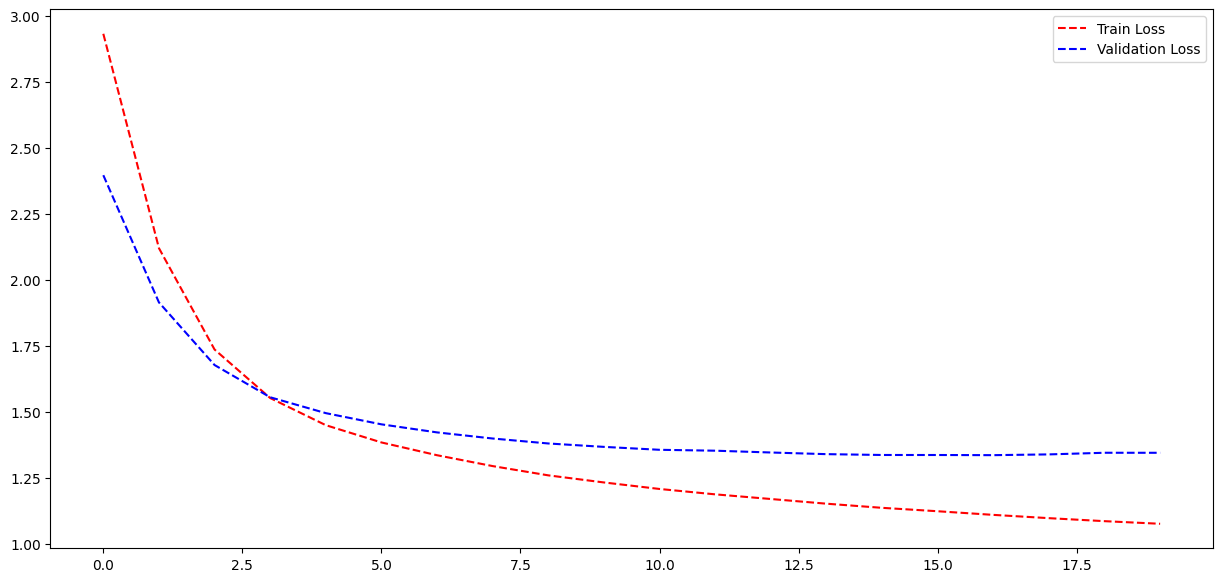

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

plt.plot(total_train_losses, 'r--' ,label="Train Loss")
plt.plot(total_val_losses, 'b--',label="Validation Loss")
plt.legend()

## Test Time

In [38]:
import numpy as np
import torch

def generate_text(model, size=100, prime="The", top_k=2):
    """
    Generates text using a trained character-level RNN model.

    This function combines the functionality of both predict() and sample() functions:
    - Predicts the next character given the current character and hidden state
    - Samples characters sequentially to generate coherent text

    Args:
        model: The trained RNN model
        size: Length of text to generate (excluding the prime sequence)
        prime: Initial string to start generation
        top_k: Number of top candidates to consider when sampling next character
        h: Initial hidden state (if None, model will initialize it)

    Returns:
        Generated text string
    """

    # Ensure model is on the correct device (CPU/GPU)
    model.to(model.device)

    # Initialize list to store generated characters
    chars = [ch for ch in prime]

    # Initialize hidden state if not provided
    hidden = model.init_hidden(1)

    # Process the prime sequence to set up initial hidden state
    for ch in prime:
        # Convert character to one-hot encoded input
        x = np.array([[model.char2int[ch]]])
        x = one_hot_encoder(x, len(model.characters))

        # Convert to torch tensor and move to model's device
        inputs = torch.from_numpy(x).to(model.device)

        # Detach hidden state from history for current computation
        hidden = tuple([each.data for each in hidden])

        # Forward pass through the model
        out, hidden = model(inputs, hidden)

    # Start generating new characters beyond the prime sequence
    for i in range(size):
        # Get probabilities for next character
        p = torch.softmax(out, dim=1).data
        p = p.to(model.device)

        # Get top k characters if specified
        if top_k is None:
            top_ch = np.arange(len(model.characters))
        else:
            p, top_ch = p.topk(top_k)
            top_ch = top_ch.cpu().numpy().squeeze()

        # Normalize probabilities and sample
        p = p.cpu().numpy().squeeze()
        next_char = np.random.choice(top_ch, p=p/p.sum())

        # Convert to character and add to sequence
        next_char = model.int2char[next_char]
        chars.append(next_char)

        # Prepare next input
        x = np.array([[model.char2int[next_char]]])
        x = one_hot_encoder(x, len(model.characters))
        inputs = torch.from_numpy(x).to(model.device)

        # Forward pass for next character
        out, hidden = model(inputs, hidden)

    return ''.join(chars)

In [41]:
print(generate_text(model, prime="Hello ", size=100))

Hello so many there was
an interesting person when they had told her to say that he had not been to say to


## Save Model

In [42]:
model_name = "rnn_20_epoch.net"

checkpoint = {"n_hidden": model.n_hidden,
              "n_layers": model.n_layers,
              "state_dict": model.state_dict(),
              "tokens": model.characters}

with open(model_name, 'wb') as f:
  torch.save(checkpoint, f)

## Load Model

In [44]:
with open("rnn_20_epoch.net", 'rb') as f:
  checkpoint = torch.load(f)

loaded_model = CharRNN(checkpoint['tokens'], n_hidden=checkpoint['n_hidden'], n_layers=checkpoint['n_layers'])
loaded_model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

## Use Loaded Model

In [52]:
print(generate_text(loaded_model, prime="tobe or not ", size=100))

tobe or not to
be able to do. I should be strange to the secret position as the sould
of company, to bear the si
